In [1]:
import numpy as np 
import pandas as pd

In [2]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [3]:
df.shape

(400, 8)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [5]:
from sklearn.model_selection import train_test_split

seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280, 1), (120, 1))

## Define all libraries and functions needed

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2

from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1

In [49]:
#a)

lr = 1e-3
decay = 1e-3
batch_size = 8
epochs = 10000
epochs_interval =100
early_stop_threshold = 1e-2

model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

val_loss=[100]

for i in range(epochs//epochs_interval):
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs_interval, verbose=0, validation_data=(X_test, y_test), shuffle=True)
    val_loss.append(h.history['val_loss'][-1])
    print(epochs_interval*(i+1),val_loss[-1])
    
    # if val loss increase less than early stop thrshold, then stop
    if val_loss[-1] * (1+early_stop_threshold) > val_loss[-2]:
        break
        

# plt.figure()
# plt.plot(h.history['loss'])
# plt.plot(h.history['val_loss'])
# plt.title('mse')
# plt.xlabel('epoch')
# plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')

100 0.02856545429676771
200 0.022017481550574303
300 0.019539776630699633
400 0.018098842787245908
500 0.017100209929049016
600 0.01634978726506233
700 0.01576869549850623
800 0.01529461337874333
900 0.014892977786560853
1000 0.014551627822220326
1100 0.014252540282905101
1200 0.013990615804990133
1300 0.013747573426614205
1400 0.013523775804787874
1500 0.013320653419941663
1600 0.01313172367711862
1700 0.012955981741348903
1800 0.0127891864006718
1900 0.012629815998176733
2000 0.012477560465534528
2100 0.012335706781595946
2200 0.012200880826761325
2300 0.012071108197172482
2400 0.011944116310526927
2500 0.011821737823386988
2600 0.011702289214978616
2700 0.011586751323193312


iteration 0 ...
last val loss:  0.020026469727357228 

iteration 1 ...
last val loss:  0.016679410263895987 

iteration 2 ...
last val loss:  0.015213798048595588 

iteration 3 ...
last val loss:  0.014299235927561918 

iteration 4 ...
last val loss:  0.013569617830216884 

iteration 5 ...
last val loss:  0.012946135985354582 

iteration 6 ...
last val loss:  0.012416670036812624 

iteration 7 ...
last val loss:  0.011948929851253827 

iteration 8 ...
last val loss:  0.011525702166060607 

iteration 9 ...
last val loss:  0.01114256860067447 

10 iteration last mse:  [0.02002647 0.01667941 0.0152138  0.01429924 0.01356962 0.01294614
 0.01241667 0.01194893 0.0115257  0.01114257]
avg last mse 0.013976853843778373


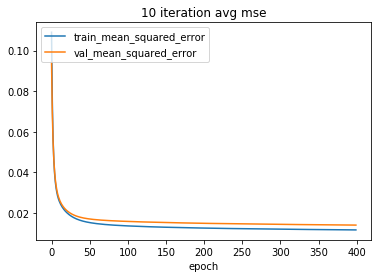

In [35]:
# # b)
# # As we can see, the test error converges at around 400 epochs
# epochs = 2700

# iteration=10

# model = Sequential([
#     Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
#     Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
#     ])

# model.compile(optimizer=optimizers.SGD(lr=lr),
#                   loss='mse')

# loss = []
# val_loss = []

# for i in range(iteration):
    
#     print(f'iteration {i} ...')

#     h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, y_test), shuffle=True)
    
#     loss.append(h.history['loss'])
#     val_loss.append(h.history['val_loss'])
    
#     print('last val loss: ', val_loss[-1][-1], '\n')
    
# avg_loss = np.mean(loss, axis=0)
# avg_val_loss = np.mean(val_loss, axis=0)

# print(f'{iteration} iteration last mse: ', np.array(val_loss).T[-1])
# print('avg last mse', avg_val_loss[-1])

# plt.figure()
# plt.plot(avg_loss)
# plt.plot(avg_val_loss)
# plt.title(f'{iteration} iteration avg mse')
# plt.xlabel('epoch')
# plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')

array([0.01762973, 0.01575541, 0.01467742, 0.01386035, 0.01321006,
       0.0126684 , 0.01218633, 0.0117442 , 0.01133026, 0.01095839])

In [32]:
np.array(val_loss).shape

(10, 400)

mean root square error:  0.08683359810631744


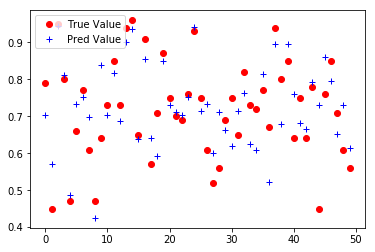

In [13]:
# c)
_, X_test_50, _, y_test_50 = train_test_split(X_test, y_test, test_size=50, random_state=42)
print(X_test_50.shape, y_test_50.shape)

y_pred_50 = model.predict(x=X_test_50)
print('mean root square error: ', np.sqrt(mean_squared_error(y_test_50, y_pred_50)))

plt.figure()
plt.plot(y_test_50, 'ro')
plt.plot(y_pred_50, 'b+')
plt.legend(['True Value', 'Pred Value',], loc='upper left')

## Q2.Correlation Matrix

In [14]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


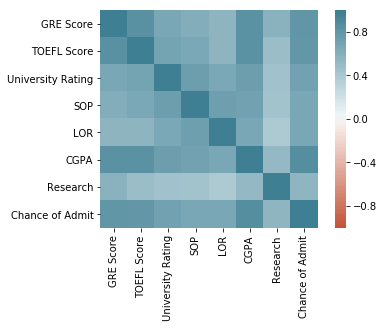

In [15]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [16]:
#a) most correlated features
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)-1):
        if corr.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('GRE Score', 'TOEFL Score', 0.8359768030143953)

In [17]:
#b) 
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit[0]

('CGPA', 0.8732890993553011)

## Q3 Recuisive Feature Elimination

### TODO
for every feature set:
    do{
        use cross validation + early stop, get the average of best epochs for all validations
        train model with all training data for the average best epoch
        get mse 
    }
    


In [57]:
#a) keep 6 features

features = list(df.columns)[:-1]
print(features, '\n')

mse = dict(zip(features, [0 for i in features]))

epochs=2700

for i in range(len(features)):
    excluded_feature = features[i]
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in features if f!=excluded_feature]}')
    X_train_removed, X_test_removed = np.delete(X_train, obj=i, axis=1), np.delete(X_test, obj=i, axis=1)
    
    print(X_train_removed.shape)
    
    model = Sequential([
    Dense(10, input_dim=X_train_removed.shape[1], activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(y_train.shape[1], kernel_initializer='he_normal', kernel_regularizer=l2(decay))
    ])

    model.compile(optimizer=optimizers.SGD(lr=lr),
                  loss='mse')

    h = model.fit(X_train_removed, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test_removed, y_test), shuffle=True)
    
    mse[excluded_feature] = h.history['val_loss'][-1]
    
mse

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'] 


removed GRE Score...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
(280, 6)

removed TOEFL Score...
feature kept: ['GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
(280, 6)

removed University Rating...
feature kept: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
(280, 6)

removed SOP...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
(280, 6)


KeyboardInterrupt: 

## Q4